## Question : 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fact_transport.csv")

In [4]:
df['month'] = pd.to_datetime(df['month'])

In [5]:
filtered_df = df[['dist_code', 'month', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']]

In [6]:
filtered_df['month'] = pd.to_datetime(filtered_df['month'])

C:\Users\raman\AppData\Local\Temp\ipykernel_24276\4179085375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = pd.to_datetime(filtered_df['month'])


In [7]:
# Define the date ranges for FY2021 and FY2022
start_date_fy2021 = '2021-04-01'
end_date_fy2021 = '2022-03-31'
start_date_fy2022 = '2022-04-01'
end_date_fy2022 = '2023-03-31'

# Create DataFrames for FY2021 and FY2022
FY2021 = filtered_df[(filtered_df['month'] >= start_date_fy2021) & (filtered_df['month'] <= end_date_fy2021)]
FY2022 = filtered_df[(filtered_df['month'] >= start_date_fy2022) & (filtered_df['month'] <= end_date_fy2022)]

# Display the first few rows of each DataFrame to verify the filtering
print("FY2021 Data:")
print(FY2021.head())
print("\nFY2022 Data:")
print(FY2022.head())

FY2021 Data:
    dist_code      month  fuel_type_petrol  fuel_type_diesel  \
720      21_3 2021-04-01               990               285   
721      21_7 2021-04-01              1750               360   
722      14_1 2021-04-01              3301               661   
723      17_3 2021-04-01              1893               474   
724      14_3 2021-04-01              1718               539   

     fuel_type_electric  
720                   0  
721                  10  
722                  19  
723                   6  
724                   2  

FY2022 Data:
     dist_code      month  fuel_type_petrol  fuel_type_diesel  \
1080      14_4 2022-04-01               936               312   
1081      21_7 2022-04-01              1291               211   
1082      14_1 2022-04-01              2185               433   
1083      17_3 2022-04-01              2034               521   
1084      14_3 2022-04-01              1489               383   

      fuel_type_electric  
1080          

In [9]:
# Calculate total vehicle sales for each fuel type in FY2021
fy2021_petrol_sales = FY2021['fuel_type_petrol'].sum()
fy2021_diesel_sales = FY2021['fuel_type_diesel'].sum()
fy2021_electric_sales = FY2021['fuel_type_electric'].sum()

In [10]:
# Calculate total vehicle sales for each fuel type in FY2022
fy2022_petrol_sales = FY2022['fuel_type_petrol'].sum()
fy2022_diesel_sales = FY2022['fuel_type_diesel'].sum()
fy2022_electric_sales = FY2022['fuel_type_electric'].sum()

In [11]:
# Create a DataFrame for comparison
fuel_type_comparison = pd.DataFrame({
    'Fuel_Type': ['Petrol', 'Diesel', 'Electric'],
    'FY2021_Sales': [fy2021_petrol_sales, fy2021_diesel_sales, fy2021_electric_sales],
    'FY2022_Sales': [fy2022_petrol_sales, fy2022_diesel_sales, fy2022_electric_sales]
})

In [12]:
# Calculate the percentage change in vehicle sales for each fuel type
fuel_type_comparison['Percentage_Change'] = ((fuel_type_comparison['FY2022_Sales'] - fuel_type_comparison['FY2021_Sales']) / fuel_type_comparison['FY2021_Sales']) * 100

In [13]:
# Display the comparison DataFrame
print("Comparison of Vehicle Sales by Fuel Type (FY2021 vs. FY2022):\n")
print(fuel_type_comparison)

Comparison of Vehicle Sales by Fuel Type (FY2021 vs. FY2022):

  Fuel_Type  FY2021_Sales  FY2022_Sales  Percentage_Change
0    Petrol       1300723       1118857         -13.981916
1    Diesel        199346        196103          -1.626820
2  Electric         31004         62532         101.690105


In [29]:
# Group and sum the values for each fuel type (petrol, diesel, electric) across FY2021 and FY2022
FY2021_grouped = FY2021.groupby('dist_code').agg({
    'fuel_type_petrol': 'sum',
    'fuel_type_diesel': 'sum',
    'fuel_type_electric': 'sum'
}).reset_index()

In [30]:
FY2022_grouped = FY2022.groupby('dist_code').agg({
    'fuel_type_petrol': 'sum',
    'fuel_type_diesel': 'sum',
    'fuel_type_electric': 'sum'
}).reset_index()

In [31]:
FY2021_grouped.head()

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric
0,14_1,31344,6029,324
1,14_2,14239,2309,52
2,14_3,19215,5964,105
3,14_4,13584,2686,146
4,15_1,184204,24711,5918


In [32]:
FY2022_grouped.head()

,dist_code,fuel_type_petrol,fuel_type_diesel,fuel_type_electric
0,14_1,20274,4790,387
1,14_2,10911,2336,84
2,14_3,14210,5167,171
3,14_4,9641,2745,154
4,15_1,200289,27843,13606


In [33]:
# Merge the two data frames on 'dist_code' to compare FY2021 and FY2022 values
merged_data = FY2021_grouped.merge(FY2022_grouped, on='dist_code', suffixes=('_FY2021', '_FY2022'))

In [51]:
merged_data.head()

,dist_code,fuel_type_petrol_FY2021,fuel_type_diesel_FY2021,fuel_type_electric_FY2021,fuel_type_petrol_FY2022,fuel_type_diesel_FY2022,fuel_type_electric_FY2022,fuel_type_petrol_Percentage_Change,fuel_type_diesel_Percentage_Change,fuel_type_electric_Percentage_Change
0,14_1,31344,6029,324,20274,4790,387,-35.317764,-20.550672,19.444444
1,14_2,14239,2309,52,10911,2336,84,-23.372428,1.169337,61.538462
2,14_3,19215,5964,105,14210,5167,171,-26.047359,-13.363514,62.857143
3,14_4,13584,2686,146,9641,2745,154,-29.026796,2.196575,5.479452
4,15_1,184204,24711,5918,200289,27843,13606,8.732167,12.674517,129.908753


In [52]:
# Calculate the percentage change for each fuel type
merged_data['fuel_type_petrol_Percentage_Change'] = ((merged_data['fuel_type_petrol_FY2022'] - merged_data['fuel_type_petrol_FY2021']) / merged_data['fuel_type_petrol_FY2021']) * 100

In [53]:
# Calculate the percentage change for each fuel type
merged_data['fuel_type_diesel_Percentage_Change'] = ((merged_data['fuel_type_diesel_FY2022'] - merged_data['fuel_type_diesel_FY2021']) / merged_data['fuel_type_diesel_FY2021']) * 100

In [54]:
# Calculate the percentage change for each fuel type
merged_data['fuel_type_electric_Percentage_Change'] = ((merged_data['fuel_type_electric_FY2022'] - merged_data['fuel_type_electric_FY2021']) / merged_data['fuel_type_electric_FY2021']) * 100

In [55]:
# Sort the data frame based on the percentage change in descending order
sorted_data = merged_data.sort_values(by='fuel_type_petrol_Percentage_Change', ascending=False)

In [56]:
top_3p = sorted_data[['dist_code', 'fuel_type_petrol_Percentage_Change']].head(3)
bottom_3p = sorted_data[['dist_code', 'fuel_type_petrol_Percentage_Change']].tail(3)

In [57]:
print("Top 3 Districts with Highest Vehicle Sales Growth (FY2022 vs. FY2021):")
print(top_3p)

print("\nBottom 3 Districts with Lowest Vehicle Sales Growth (FY2022 vs. FY2021):")
print(bottom_3p)

Top 3 Districts with Highest Vehicle Sales Growth (FY2022 vs. FY2021):
  dist_code  fuel_type_petrol_Percentage_Change
4      15_1                            8.732167
7      16_1                            1.026585
5      15_2                           -0.904198

Bottom 3 Districts with Lowest Vehicle Sales Growth (FY2022 vs. FY2021):
   dist_code  fuel_type_petrol_Percentage_Change
18      20_2                          -40.525155
14      19_2                          -41.051352
21      21_2                          -45.319828


C:\Users\raman\AppData\Local\Temp\ipykernel_24276\1265847984.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_data = top_3p.append(bottom_3p)


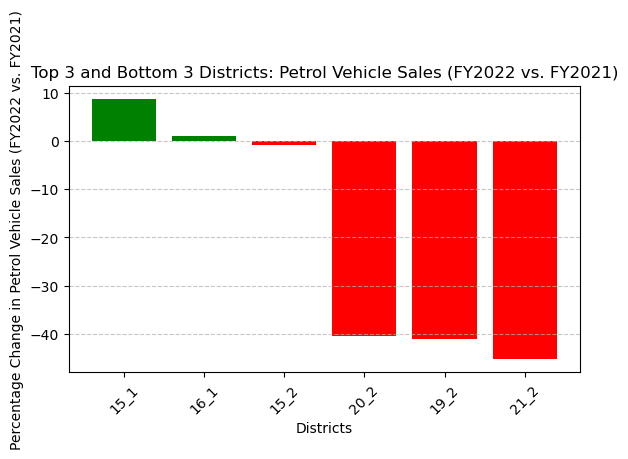

In [69]:
# Top 3 and bottom 3 districts
top_bottom_data = top_3p.append(bottom_3p)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(top_bottom_data['dist_code'], top_bottom_data['fuel_type_petrol_Percentage_Change'], color=['green' if x >= 0 else 'red' for x in top_bottom_data['fuel_type_petrol_Percentage_Change']])
plt.xlabel('Districts')
plt.ylabel('Percentage Change in Petrol Vehicle Sales (FY2022 vs. FY2021)')
plt.title('Top 3 and Bottom 3 Districts: Petrol Vehicle Sales (FY2022 vs. FY2021)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
# Sort the data frame based on the percentage change in descending order
sorted_data = merged_data.sort_values(by='fuel_type_diesel_Percentage_Change', ascending=False)

In [59]:
top_3d = sorted_data[['dist_code', 'fuel_type_diesel_Percentage_Change']].head(3)
bottom_3d = sorted_data[['dist_code', 'fuel_type_diesel_Percentage_Change']].tail(3)

In [60]:
print("Top 3 Districts with Highest Vehicle Sales Growth (FY2022 vs. FY2021):")
print(top_3d)

print("\nBottom 3 Districts with Lowest Vehicle Sales Growth (FY2022 vs. FY2021):")
print(bottom_3d)

Top 3 Districts with Highest Vehicle Sales Growth (FY2022 vs. FY2021):
   dist_code  fuel_type_diesel_Percentage_Change
17      20_1                          111.442193
9       17_2                           13.206396
4       15_1                           12.674517

Bottom 3 Districts with Lowest Vehicle Sales Growth (FY2022 vs. FY2021):
   dist_code  fuel_type_diesel_Percentage_Change
22      21_3                          -21.996830
23      21_5                          -24.289467
21      21_2                          -48.032185


C:\Users\raman\AppData\Local\Temp\ipykernel_24276\3439526543.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_data = top_3d.append(bottom_3d)


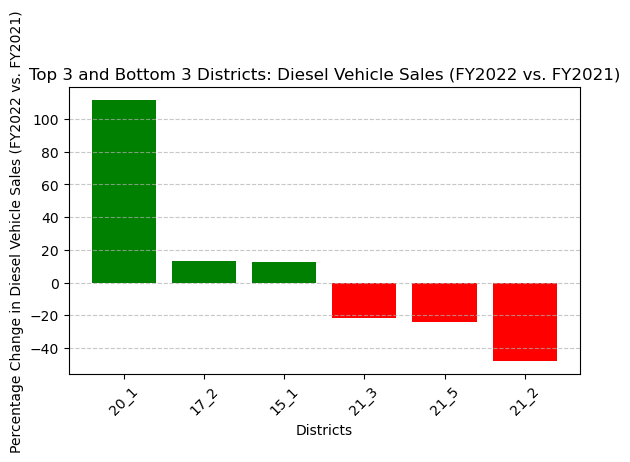

In [70]:
# Top 3 and bottom 3 districts
top_bottom_data = top_3d.append(bottom_3d)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(top_bottom_data['dist_code'], top_bottom_data['fuel_type_diesel_Percentage_Change'], color=['green' if x >= 0 else 'red' for x in top_bottom_data['fuel_type_diesel_Percentage_Change']])
plt.xlabel('Districts')
plt.ylabel('Percentage Change in Diesel Vehicle Sales (FY2022 vs. FY2021)')
plt.title('Top 3 and Bottom 3 Districts: Diesel Vehicle Sales (FY2022 vs. FY2021)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [61]:
# Sort the data frame based on the percentage change in descending order
sorted_data = merged_data.sort_values(by='fuel_type_electric_Percentage_Change', ascending=False)

In [62]:
top_3e = sorted_data[['dist_code', 'fuel_type_electric_Percentage_Change']].head(3)
bottom_3e = sorted_data[['dist_code', 'fuel_type_electric_Percentage_Change']].tail(3)

In [63]:
print("Top 3 Districts with Highest Vehicle Sales Growth (FY2022 vs. FY2021):")
print(top_3e)

print("\nBottom 3 Districts with Lowest Vehicle Sales Growth (FY2022 vs. FY2021):")
print(bottom_3e)

Top 3 Districts with Highest Vehicle Sales Growth (FY2022 vs. FY2021):
   dist_code  fuel_type_electric_Percentage_Change
25      22_1                            409.395973
26      22_2                            281.578947
28      23_2                            247.150259

Bottom 3 Districts with Lowest Vehicle Sales Growth (FY2022 vs. FY2021):
   dist_code  fuel_type_electric_Percentage_Change
15      19_3                             19.191919
19      20_3                             14.917127
3       14_4                              5.479452


C:\Users\raman\AppData\Local\Temp\ipykernel_24276\2999549768.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_data = top_3e.append(bottom_3e)


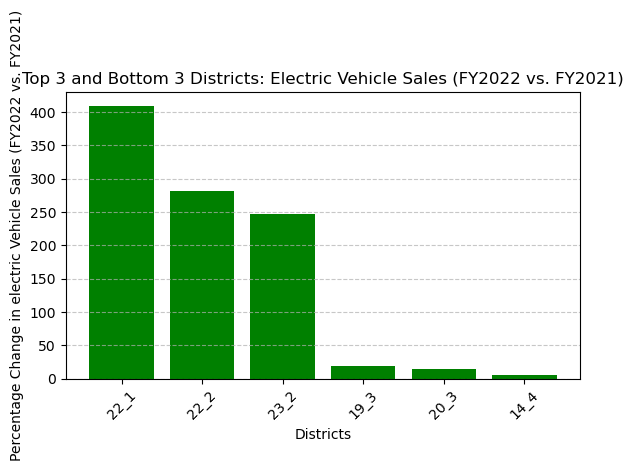

In [71]:
# Top 3 and bottom 3 districts
top_bottom_data = top_3e.append(bottom_3e)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(top_bottom_data['dist_code'], top_bottom_data['fuel_type_electric_Percentage_Change'], color=['green' if x >= 0 else 'red' for x in top_bottom_data['fuel_type_electric_Percentage_Change']])
plt.xlabel('Districts')
plt.ylabel('Percentage Change in electric Vehicle Sales (FY2022 vs. FY2021)')
plt.title('Top 3 and Bottom 3 Districts: Electric Vehicle Sales (FY2022 vs. FY2021)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()